<a href="https://colab.research.google.com/github/bento7/BigData/blob/main/CHAUVEL_BENJAMIN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

# Speed Dating Dataset Analysis

## Benjamin CHAUVEL
### SOIA23
</center>

Nous allons nous placer dans la peau d'un Data Scientist qui souhaiterais optimiser sa recherche de nouvelles aventures sociales. Nous souhaitons savoir ce qui fait que l'on apprécie une personne, que recherche chez son/sa partenaire le genre opoosé, et le tout à la suite d'une courte discussion. Pour cela nous utiliserons des données venant d'un [dataset](https://www.kaggle.com/datasets/whenamancodes/speed-dating) de speed-dating. Nous développerons premièrement qui sont les participants et quelles sont leurs volontés. Nous illustrerons par la suite comment sont distribuées les rencontres. Enfin nous essayerons de prédire l'issue de la rencontre de 2 participants.


Les objectifs peuvent se résumer à partir des points suivants :
 - Qui sont les participants ?
 - Déterminer les facteurs les plus influents pour matcher
 - Prédire la probabilité de match pour 2 individus donnés
 - Optimiser la rencontre de futurs participants


# Initialisation

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.font_manager
# import dexplot as dxp
import seaborn as sns
cmap = plt.get_cmap("tab20")
import shap

# Importation du Dataset

In [ ]:
path = 'Speed Dating Data.csv'
data = pd.read_csv(path,sep=",",encoding = "ISO-8859-1")
pd.set_option('display.max_columns',195)
data.head(500)

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,2,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,3,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,4,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,1,7.0,8.0,9.0,8.0,9

In [ ]:
data.shape

(8378, 195)

Le dataset utilisé est constité de 195 colonnes et 8378 lignes.

1 ligne correspond à la rencontre entre 2 partipants.

Voici la description d'une partie des colonnes du dataset:
1. iid: unique subject number, grouped by wave id gender

2. pid: partner’s iid number

3. gender: Female = 0, Male = 1

4. match: 1 = yes, 0 = no

5. age: age of subject

6. field: field of study

7. race: Black/African American = 1, European/Caucasian-American = 2, Latino/Hispanic American = 3, Asian/Pacific Islander/Asian-American = 4, Native American = 5, Other = 6

8. from: Where are you from originally (before coming to Columbia)?

9. income: Median household income based on zipcode

10. goal: What is your primary goal in participating in this event? Seemed like a fun night out = 1, To meet new people = 2, To get a date = 3, Looking for a serious relationship = 4, To say I did it = 5, Other = 6

11. career: What is your intended career?

12. wave: wave number

These are the common variables we chose to analyze missing values. There were several questions in this experiment, but we chose three in specific, which were most relevant to our project and analyzed missing values for all three questions separately.

The three questions are:

Question 1_1:

We want to know what you look for in the opposite sex.

13. attr1_1: Attractive

14. sinc1_1: Sincere

15. intel1_1: Intelligent

16. fun1_1: Fun

17. amb1_1: Ambitious

These are the 5 other variables of question 1_1.

Question 2_1:

What do you think the opposite sex looks for in a date?

13. att2_1: Attractive

14. sinc2_1: Sincere

15. intel2_1: Intelligent

16. fun2_1: Fun

17. amb2_1: Ambitious

These are the 5 other variables of question 2_1.

Question 4_1:

Now we want to know what you think MOST of your fellow men/women look for in the opposite sex

13. attr4_1: Attractive

14. sinc4_1: Sincere

15. intel4_1: Intelligent

16. fun4_1: Fun

17. amb4_1: Ambitious

Les autres colonnes ayant la même typologies de noms correspondent à des questions posées à la suite des rencontres que nous évoquerons dans la suite du développement.

Nous avons un premier aperçu du dataset et nous remarquons que nous disposons de beaucoup d'informations. Nous allons de suite commencer à les explorer.

# Exploration des données

In [ ]:
data['iid'].value_counts().describe()

count    551.000000
mean      15.205082
std        5.013768
min        5.000000
25%       10.000000
50%       16.000000
75%       20.000000
max       22.000000
Name: iid, dtype: float64

Nous avons au sein du dataset 551 personnes qui en moyenne rencontrent 15 personnes.

In [ ]:
for gender in np.unique(data['gender']):
    gen = data[data['gender']==gender]
    id = gen['iid']
    pid = gen['pid'] #pid est l'iid du partenaire rencontré
    mask = np.isin(id,pid)
    print(any(mask))

False
False


Le dataset est composé que de rencontres hétérosexuelles.

## Valeurs manquantes

In [ ]:
mis = np.sum(data.isnull())
mis = mis.to_frame()
mis=mis.rename(columns={0:'MissingValue'})
mis = mis.sort_values(by='MissingValue',ascending=False)
mis

,MissingValue
num_in_3,7710
numdat_3,6882
expnum,6578
sinc7_2,6423
amb7_2,6423
...,...
wave,0
condtn,0
idg,0
gender,0


Ces valeurs manquantes révèlent que certaines colonnes ont une majorité de valeurs manquantes comme l'illustre la figure ci-dessous.

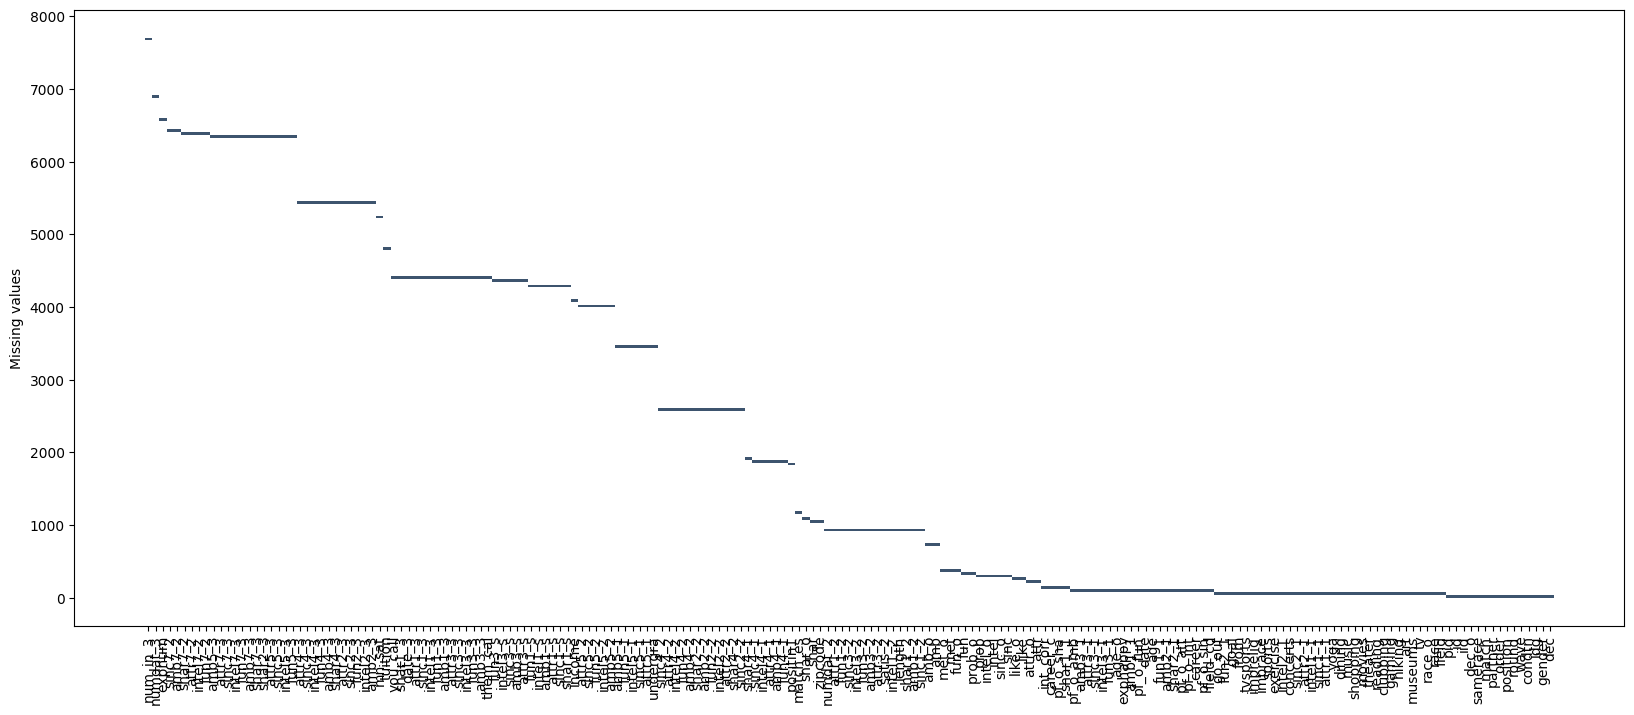

In [ ]:
plt.figure(figsize=(20,8))
ax = sns.histplot(data=mis,y='MissingValue',x=mis.index,bins=len(mis.index),fill=True)
plt.xticks(rotation = 90)
plt.yticks(fontsize=10)
plt.ylabel('Missing values',fontsize=10)
plt.show()

Certaines questions ont très peu de valeurs. Elles n'étaient peut être pas posées à toutes les vagues de speed-dating organisées. Nous remarquons que nous avons le plus de valeurs manquantes sur les attributs qui sont posés en questionnaire aux personnes à posteriori du speed dating. Ces colonnes ne seront donc pas utilisées pour de l'analyse dans la suite du développement.

Nous remarquons de plus qu'il manque 10 données de 'pid' qui correspond à l'identifiant du partenaire rencontré. Ces 10 rencontres ont été effectuées lors de la vague 5 et concernent des hommes.

In [ ]:
data[data['pid'].isnull()]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
1755,122,1.0,1,2,1,5,10,4,NaN,6,7,NaN,0,-0.12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Law,1.0,NaN,NaN,NaN,6.0,1.0,1.0,Long Island,"11,793","57,887.00",1.0,3.0,1.0,Lawyer,1.0,7.0,9.0,7.0,9.0,7.0,6.0,5.0,6.0,6.0,6.0,8.0,7.0,8.0,8.0,8.0,5.0,4.0,6.0,10.0,40.0,15.0,10.0,20.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,7.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,0,6.0,10.0,8.0,8.0,8.0,8.0,8.0,4.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1.0,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,10.0,8.0,8.0,8.0,NaN,NaN,NaN,NaN,NaN
1765,123,2.0,1,4,1,5,10,4,NaN,10,7,NaN,0,-0.29,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.0,Biomedical Engineering,5.0,NaN,NaN,NaN,4.0,3.0,5.0,Louisiana,"70,605","30,768.00",2.0,5.0,1.0,Cardiologist,4.0,9.0,9.0,8.0,8.0,3.0,2.0,5.0,5.0,6.0,2.0,7.0,2.0,7.0,7.0,7.0,7.0,5.0,5.0,1.0,50.0,10.0,20.0,5.0,5.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,50.0,10.0,5.0,5.0,10.0,8.0,7.0,7.0,7.0,8.0,NaN,NaN,NaN,NaN,NaN,0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,1.0,2.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,1.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,80.0,4.0,5.0,3.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,7.0,7.0,6.0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1775,124,3.0,1,6,1,5,10,4,NaN,3,7,NaN,0,-0.05,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,22.0,Economics and Political Science,8.0,NaN,NaN,NaN,4.0,1.0,1.0,Maryland,"20,815","66,699.00",2.0,4.0,1.0,Law or finance,1.0,5.0,5.0,8.0,10.0,8.0,8.0,6.0,5.0,8.0,8.0,6.0,9.0,9.0,9.0,8.0,8.0,7.0,6.0,10.0,40.0,10.0,10.0,10.0,10.0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,20.0,30.0,10.0,10.0,20.0,10.0,8.0,8.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,1,6.0,7.0,7.0,6.0,7.0,7.0,7.0,7.0,2.0,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,10.0,10.0,10.0,10.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.0,7.0,10.0,8.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1785,125,4.0,1,8,1,5,10,4,NaN,8,7,NaN,0,0.15,0,NaN,NaN,NaN,NaN,NaN,

In [ ]:
ids5 = data[data['wave']==5].iid.unique()
for id in ids5:
    print('id =',id,'; nombre de rencontres en tant que partenaire:',len(data[data['pid']==id]))

id = 112 ; nombre de rencontres en tant que partenaire: 10
id = 113 ; nombre de rencontres en tant que partenaire: 10
id = 114 ; nombre de rencontres en tant que partenaire: 10
id = 115 ; nombre de rencontres en tant que partenaire: 10
id = 116 ; nombre de rencontres en tant que partenaire: 10
id = 117 ; nombre de rencontres en tant que partenaire: 10
id = 119 ; nombre de rencontres en tant que partenaire: 10
id = 120 ; nombre de rencontres en tant que partenaire: 10
id = 121 ; nombre de rencontres en tant que partenaire: 10
id = 122 ; nombre de rencontres en tant que partenaire: 9
id = 123 ; nombre de rencontres en tant que partenaire: 9
id = 124 ; nombre de rencontres en tant que partenaire: 9
id = 125 ; nombre de rencontres en tant que partenaire: 9
id = 126 ; nombre de rencontres en tant que partenaire: 9
id = 127 ; nombre de rencontres en tant que partenaire: 9
id = 128 ; nombre de rencontres en tant que partenaire: 9
id = 129 ; nombre de rencontres en tant que partenaire: 9
id = 

De plus nous pouvons voir que c'est bien une personne exérieure au dataset qui a participé à ces rencontres car 10 hommes rencontres 10 femmes mais seulement 9 femmes ont rencontrées 10 hommes. Pour la partie prédiction nous enlèverons ces rencontres car l'intérêt est de connaître la personne rencontrée pour prédire l'issue de la discussion.

## Statistiques générales

Nous allons au sein de cette partie mettre en évidence quelques statistiques générales à propos des personnes composant notre dataset pour mieux l'analyser et prendre du recul par la suite.

La répartition des personnes par vague de speed-dating est hétérogène. Nénamoins nous remarquons que nous avons au sein du dataset un nombre égal (ou presque) d'échantillons par genre. Comme le confirme le résultat ci-dessous.

In [ ]:
ids = np.unique(data['iid'].values)
columns = list(data[data['iid']==1].iloc[0].to_frame().T.columns)
data_ids = pd.DataFrame(columns=columns)
index = 0
for id in ids:

    df = data[data['iid']==id].iloc[0].to_frame().T.loc[index]
    data_ids.loc[len(data_ids.index)] = df

    df = data[data['iid']==id]
    index += len(df)

In [ ]:
data_ids['gender'].value_counts()

1    277
0    274
Name: gender, dtype: int64

0 : Female
1 : Male

data_ids est un DataFrame constitué d'une ligne par candidat, qui correspond à la première occurence de ce candidat en parcourant le dataset.

In [ ]:
data_ids.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,partner,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field,field_cd,undergra,mn_sat,tuition,race,imprace,imprelig,from,zipcode,income,goal,date,go_out,career,career_c,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,expnum,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr4_1,sinc4_1,intel4_1,fun4_1,amb4_1,shar4_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr5_1,sinc5_1,intel5_1,fun5_1,amb5_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met,match_es,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,attr3_s,sinc3_s,intel3_s,fun3_s,amb3_s,satis_2,length,numdat_2,attr7_2,sinc7_2,intel7_2,fun7_2,amb7_2,shar7_2,attr1_2,sinc1_2,intel1_2,fun1_2,amb1_2,shar1_2,attr4_2,sinc4_2,intel4_2,fun4_2,amb4_2,shar4_2,attr2_2,sinc2_2,intel2_2,fun2_2,amb2_2,shar2_2,attr3_2,sinc3_2,intel3_2,fun3_2,amb3_2,attr5_2,sinc5_2,intel5_2,fun5_2,amb5_2,you_call,them_cal,date_3,numdat_3,num_in_3,attr1_3,sinc1_3,intel1_3,fun1_3,amb1_3,shar1_3,attr7_3,sinc7_3,intel7_3,fun7_3,amb7_3,shar7_3,attr4_3,sinc4_3,intel4_3,fun4_3,amb4_3,shar4_3,attr2_3,sinc2_3,intel2_3,fun2_3,amb2_3,shar2_3,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,1,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0,21.0,Law,1.0,NaN,NaN,NaN,4.0,2.0,4.0,Chicago,"60,521","69,487.00",2.0,7.0,1.0,lawyer,NaN,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,2.0,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,NaN,NaN,NaN,NaN,NaN,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,19.44,16.67,13.89,22.22,11.11,16.67,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,7.0,8.0,7.0,6.0,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,15.0,20.0,20.0,15.0,15.0,15.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,2,2.0,0,3,1,1,10,3,NaN,10,1,11.0,0,0.29,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,8.0,7.0,6.0,9.0,7.0,4.0,7.0,2.0,2.0,24.0,law,1.0,NaN,NaN,NaN,2.0,2.0,5.0,Alabama,"35,223","65,929.00",1.0,5.0,1.0,law,NaN,3.0,2.0,7.0,10.0,8.0,6.0,3.0,5.0,8.0,10.0,1.0,9.0,8.0,7.0,8.0,3.0,1.0,4.0,5.0,45.0,5.0,25.0,20.0,0.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,65.0,0.0,10.0,25.0,0.0,0.0,7.0,5.0,10.0,8.0,3.0,NaN,NaN,NaN,NaN,NaN,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.92,18.92,21.62,27.03,5.41,8.11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,8.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,30.0,5.0,40.0,15.0,0.0,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.0,6.0,9.0,9.0,4.0,NaN,NaN,NaN,NaN,NaN
2,3,3.0,0,5,1,1,10,9,NaN,6,1,11.0,0,-0.24,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,7.0,8.0,6.0,5.0,8.0,4.0,5.0,2.0,1.0,25.0,Economics,2.0,NaN,NaN,NaN,2.0,8.0,4.0,Connecticut,"6,268",NaN,6.0,3.0,1.0,Economist,NaN,3.0,8.0,7.0,8.0,5.0,5.0,8.0,4.0,5.0,7.0,8.0,7.0,7.0,7.0,5.0,8.0,7.0,4.0,2.0,35.0,10.0,35.0,10.0,10.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,50.0,0.0,20.0,30.0,0.0,0.0,8.0,9.0,8.0,9.0,8.0,NaN,NaN,NaN,NaN,NaN,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4.0,0,7,1,1,10,6,NaN,3,1,11.0,0,-0.18,1,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,0,6.0,7.0,8.0,7.0,7.0,5.0,6.0,3.0,2.0,23.0,Law,1.0,N

### Field of work

In [ ]:
data_ids['field_cd'].value_counts().index

Float64Index([ 8.0, 10.0,  5.0,  1.0, 13.0,  3.0,  9.0, 11.0,  6.0,  7.0,  2.0,
              15.0,  4.0, 14.0, 16.0, 18.0, 12.0, 17.0],
             dtype='float64')

In [ ]:
labels = np.array(['Law','Mathematics','Psychology','Medicine','Research','Writer','Literature','Finance','Education','Biology','Social','Student','Academy','Film','Acting','Language','Architecture','Other'])

In [ ]:
colors = cmap(np.arange(len(labels))*1)

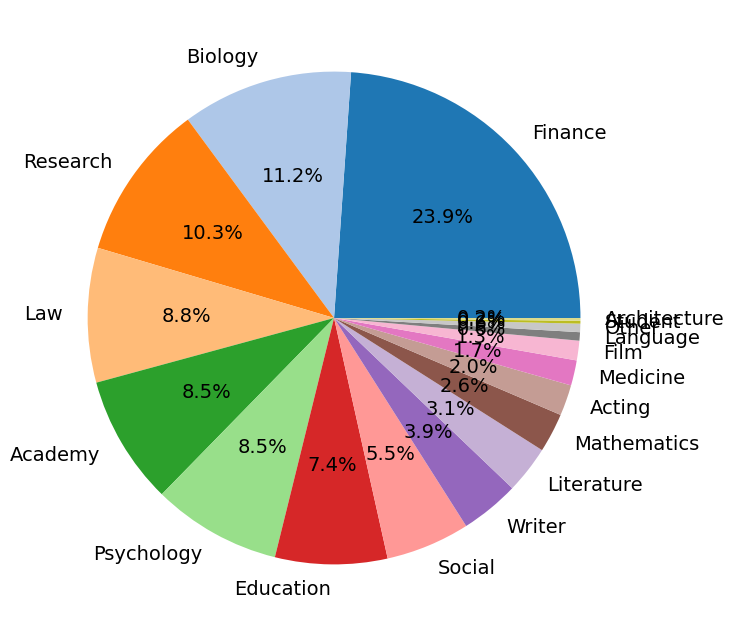

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data_ids['field_cd'].value_counts(),labels=labels[np.array(data_ids['field_cd'].value_counts().index,dtype=int)-1],textprops={'fontsize': 14},autopct='%1.1f%%',colors=colors)
plt.show()

Nous avons au sein du dataset des personnes travaillant dans des domaines différents mais qui sont très éduquées. Cela est dû au fait que cette étude a été réalisée au sein d'une université. Nous ne pourrons donc pas à priori généraliser ces résultats à des speed-dating englobant une partie plus large de la population qui ne soit pas universitaire.

### Age distribution

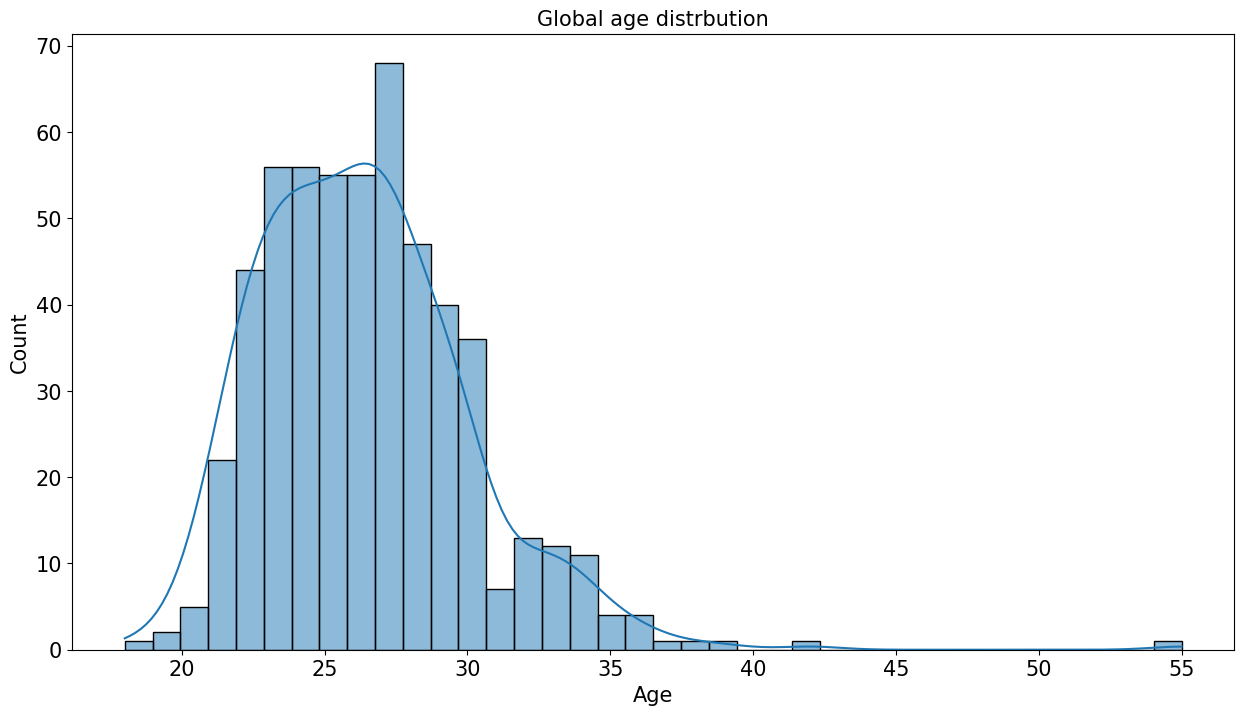

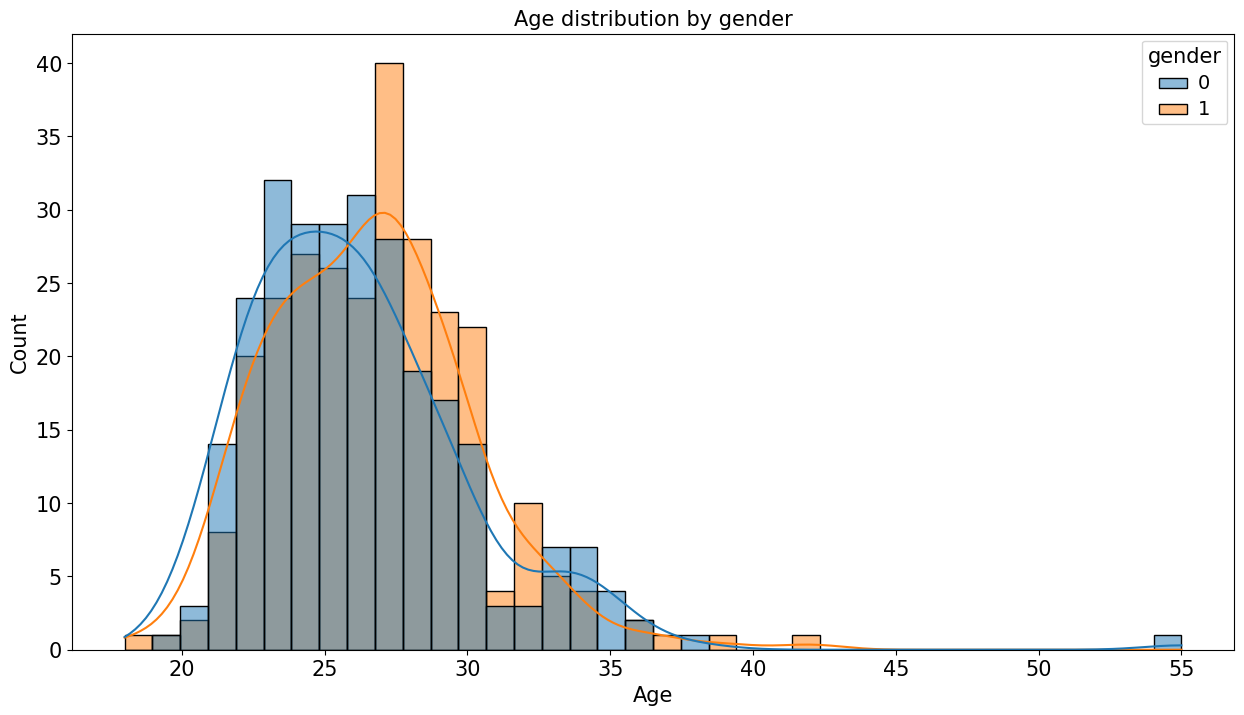

In [ ]:
plt.figure(figsize=(15,8))
sns.histplot(data=data_ids,x='age',kde=True)
plt.xticks(fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Global age distrbution',fontsize=15)
plt.show()

plt.figure(figsize=(15,8))
ax=sns.histplot(data=data_ids,x='age',kde=True,hue='gender')#,y='count',hue='gender')
plt.setp(ax.get_legend().get_texts(), fontsize='14') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='15') # for legend title
plt.xticks(fontsize=15)
plt.xlabel('Age',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('Age distribution by gender',fontsize=15)
plt.show()

Au global les personnes interrogées sont agées de 20 à 39 ans. Les hommes sont un peu plus vieux que les femmes.

In [ ]:
df_agerace = data_ids.groupby('race')['age'].mean().to_frame().reset_index(names='race')
labels_=['Black/African American','European/Caucasian-American','Latino/Hispanic American','Asian/Pacific Islander/Asian-American','Other']

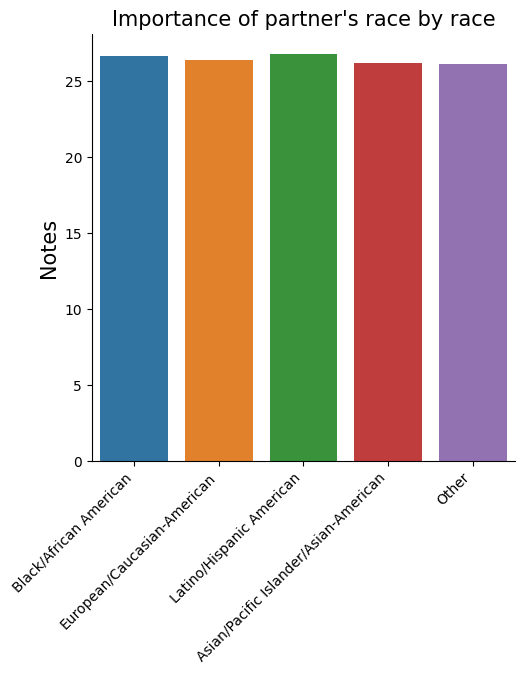

In [ ]:
fg = sns.catplot(data=df_agerace,x='race',y='age',kind='bar')
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
# plt.ylim([0,38])
plt.xlabel('')
plt.title('Importance of partner\'s race by race',fontsize=15)
plt.show()

L'âge est homogène entre les personnes d'origines différentes.

### Goal of the night

Nous allons maintenant visualiser avec quelle intention les personnes sont venues à ce speed-dati

In [ ]:
goals = np.array(['Seemed like a fun night out','To meet new people','To get a date','Looking for a serious relationship','To say I did it','Other reason...'])

In [ ]:
colors = cmap(np.arange(len(goals))*2)

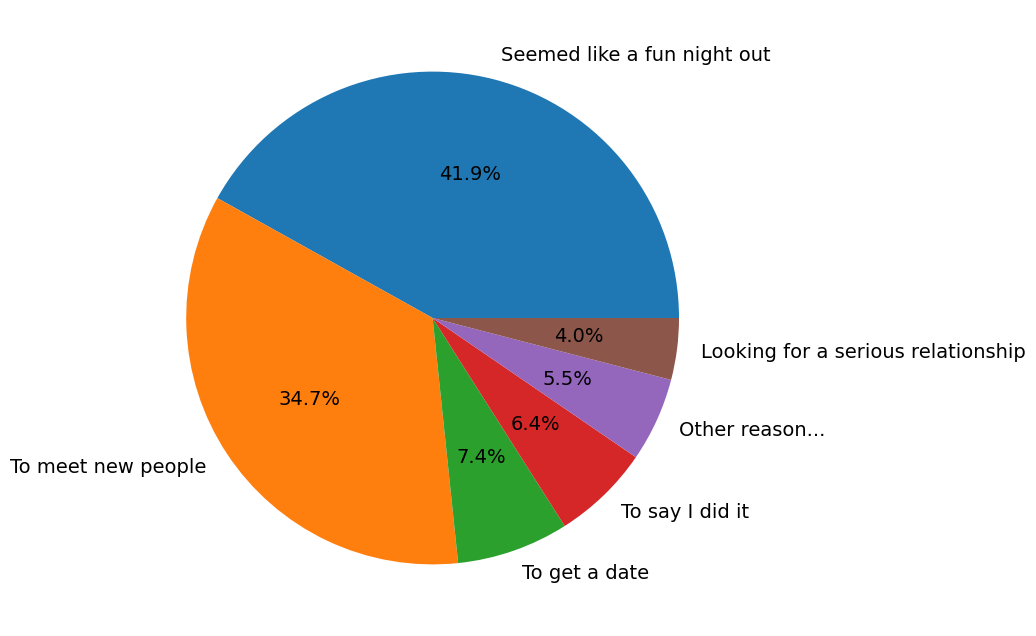

In [ ]:
plt.figure(figsize=(8,8))
plt.pie(data_ids['goal'].value_counts(),labels=goals[np.array(data_ids['goal'].value_counts().index,dtype=int)-1],textprops={'fontsize': 14},autopct='%1.1f%%',colors=colors)
plt.show()

La plupart des personnes viennent à ce speed-dating sans se prendre la tête juste pour une soirée fun ou rencontrer des nouvelles personnes. Cela pourra être pris en compte par suite car les personnes peuvent être plus ouvertes que si elles cherchaient une relation sérieuse.

### Interests

In [ ]:
interests = ['sports', 'tvsports', 'exercise', 'dining', 'museums',
             'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
             'movies', 'concerts', 'music', 'shopping', 'yoga']

Text(0.5, 1.0, 'Correlation between interests')

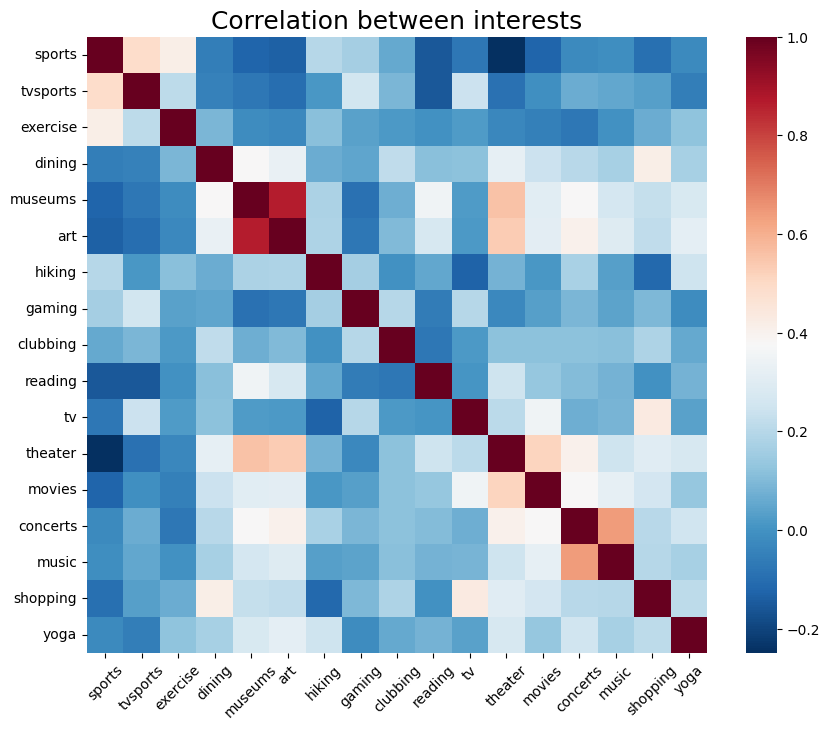

In [ ]:
corr = data_ids[interests].astype(dtype=float).corr()
plt.figure(figsize=(10,8))
ax = sns.heatmap(corr, cmap='RdBu_r')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
ax.set_title('Correlation between interests', fontsize=18)

Seuls les arts sont corrélés ensembles tels que les musées, le théâtre, la musique, les films et l'art.

In [ ]:
def df_attributes(attributes):
    df_mis_drop = data[attributes]
    dfm = df_mis_drop.melt('gender', var_name='cols', value_name='vals')
    dfm0 = dfm[dfm['gender'] == 0][['cols', 'vals']].groupby('cols').mean()
    dfm1 = dfm[dfm['gender'] == 1][['cols', 'vals']].groupby('cols').mean()
    dfm0['gender'] = 0
    dfm1['gender'] = 1
    df_concat = pd.concat([dfm0, dfm1])
    df_concat = df_concat.reset_index(names=['cols'])
    return df_concat

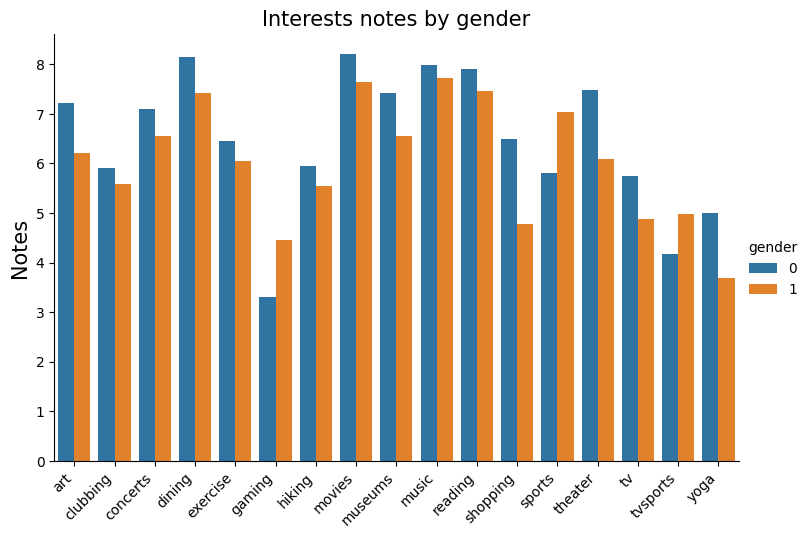

In [ ]:
attributes = interests.copy()
attributes.append('gender')
df_concat = df_attributes(attributes)
labels_ = attributes
fg = sns.catplot(data=df_concat,x='cols',y='vals',hue='gender',kind='bar',height=5, aspect=1.5)
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        # label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
plt.xlabel('')
plt.title('Interests notes by gender',fontsize=15)
plt.show()

Nous remarquons que les femmes disent plus apprécier les activités liées à l'Art alors que les hommes au sport et aux divertissements. Nénamoins les valeurs au sein de chaque catégorie se reseemble entre les hommes et les femmes.

### Ethny appartenance

In [ ]:
data_ids['race'].value_counts()

2.0    304
4.0    136
3.0     42
6.0     37
1.0     26
Name: race, dtype: int64

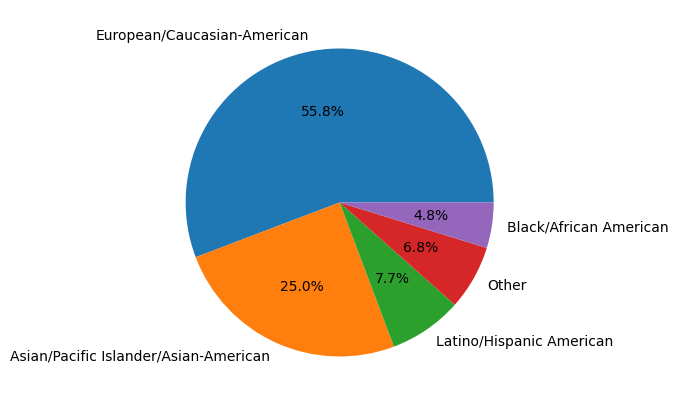

In [ ]:
plt.figure(figsize=(5,5))
plt.pie(data_ids['race'].dropna().value_counts(),labels=['European/Caucasian-American','Asian/Pacific Islander/Asian-American','Latino/Hispanic American','Other','Black/African American'],textprops={'fontsize': 10},autopct='%1.1f%%')
plt.show()

Les participants au speed-dating sont majoritairement caucasiens. Il sera intéressant de regarder l'importance des origines des personnes sur le résultat du rendez-vous car cela pourrait leur faire un point commun qui pourrait les réunir.

Selon les personnes interrogées l'importance de l'origine est peu importante sur l'issue de la rencontre.

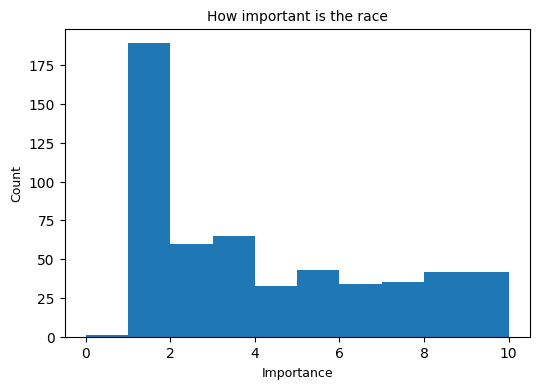

In [ ]:
ax = data_ids.imprace.hist(bins=10, figsize=(6,4))
ax.set_title('How important is the race', fontsize=10)
ax.set_xlabel('Importance',fontsize=9)
ax.set_ylabel('Count', fontsize=9)
ax.grid(False)

invalid value encountered in greater_equal
invalid value encountered in less_equal


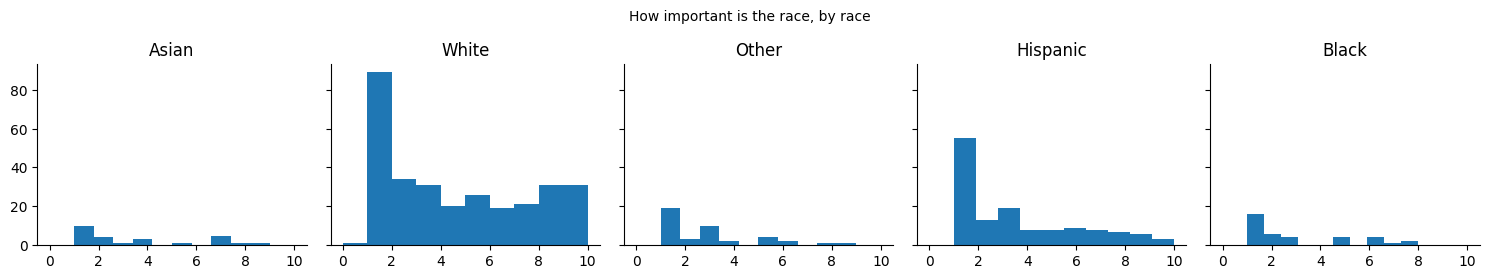

In [ ]:
g = sns.FacetGrid(data_ids, col='race')
g.map(plt.hist, 'imprace', bins=10)
axes = g.axes.flatten()
axes[0].set_title("Asian")
axes[1].set_title("White")
axes[2].set_title("Other")
axes[3].set_title("Hispanic")
axes[4].set_title("Black")
g.set_xlabels('', fontsize=1)
plt.subplots_adjust(top=0.8)
g.fig.suptitle('How important is the race, by race', fontsize=10)
g.add_legend()

La distribution de l'importance semble la même pour toutes les origines mis à part que nous disposons pas du même nombre de données pour chaque origine.

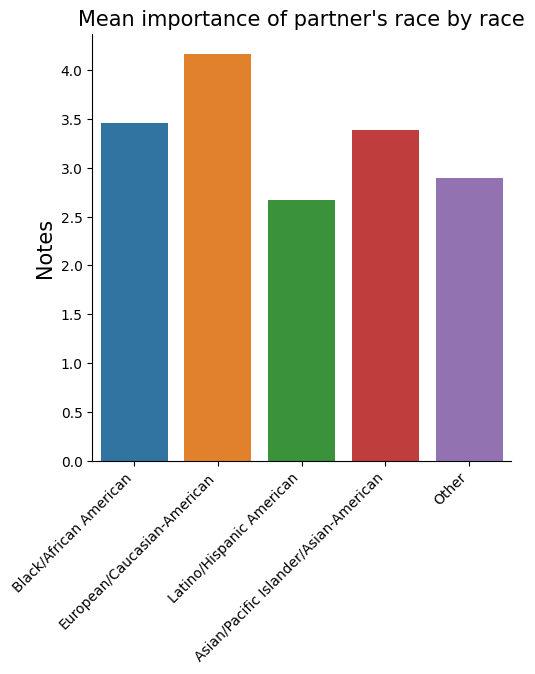

In [ ]:
# df_imprace = data_ids[['race','imprace']]
df_imprace = data_ids.groupby('race')['imprace'].mean().to_frame().reset_index(names='race')
labels_=['Black/African American','European/Caucasian-American','Latino/Hispanic American','Asian/Pacific Islander/Asian-American','Other']
fg = sns.catplot(data=df_imprace,x='race',y='imprace',kind='bar')
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
# plt.ylim([0,38])
plt.xlabel('')
plt.title('Mean importance of partner\'s race by race',fontsize=15)
plt.show()

Nous pouvons remarquer toutefois grâce à la moyenne que l'origine du partenaire est plus importante pour personnes caucasiennes. A l'inverse elle est moins importante pour les personnes d'origine hispanique.

# Description des rencontres

Le dataset est composé de rencontres effectuées au cours de plusieurs vagues réalisée entre 2002 et 2004 au sein de l'université de Columbia. La description des vagues est décrite dans la partie suivante.

## Les vagues de speed dating

This data was compiled by the professors as part of a speed dating experiment conducted in 21 waves and 13 days from 2002 to 2004.

The dates of the experiments are given below:

Wave 01: Oct 16, 2002

Wave 02: Oct 23, 2002

Wave 03: Nov 12, 2002

Wave 04: Nov 12, 2002

Wave 05: Nov 20, 2002

Wave 06: Mar 26, 2003

Wave 07: Mar 26, 2003

Wave 08: Apr 02, 2003

Wave 09: Apr 02, 2003

Wave 10: Sep 24, 2003

Wave 11: Sep 24, 2003

Wave 12: Oct 07, 2003

Wave 13: Oct 08, 2003

Wave 14: Oct 08, 2003

Wave 15: Feb 24, 2004

Wave 16: Feb 25, 2004

Wave 17: Feb 25, 2004

Wave 18: Apr 06, 2004

Wave 19: Apr 06, 2004

Wave 20: Apr 07, 2004

Wave 21: Apr 07, 2004

In [ ]:
w =[]
nb_waves = len(np.unique(data["wave"]))
for wave in range(nb_waves):
    df = data[data['wave']==wave+1]
    i0 = len(np.unique(df[df['gender']==0]['iid']))
    w.append([i0,wave+1,0])
    i1 = len(np.unique(df[df['gender']==1]['iid']))
    w.append([i1,wave+1,1])
w = np.array(w)
df_w = pd.DataFrame(data=w,
                    columns=['count','wave','gender'])
df_w.head()

,count,wave,gender
0,10,1,0
1,10,1,1
2,19,2,0
3,16,2,1
4,10,3,0


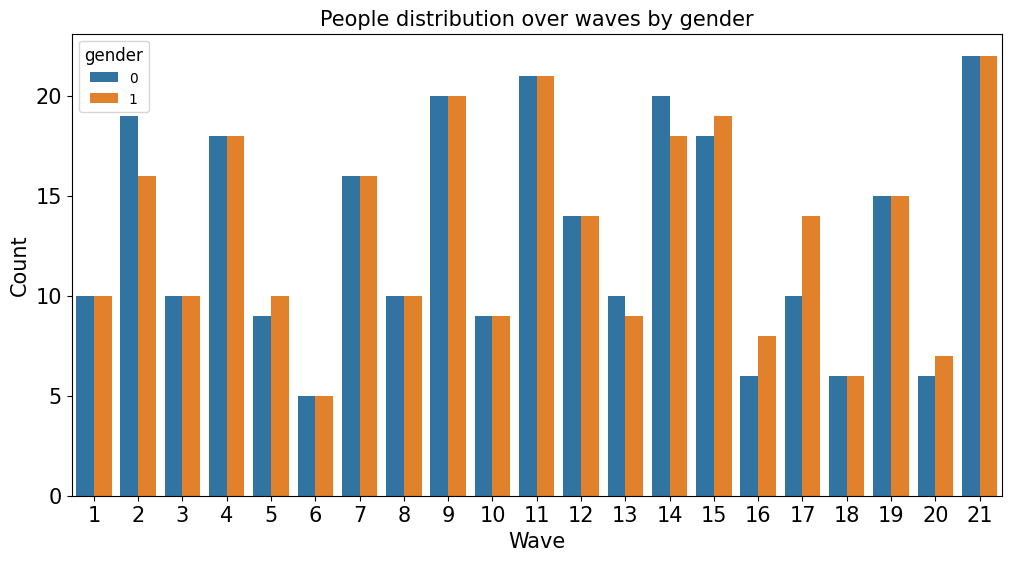

In [ ]:
plt.figure(figsize=(12,6))
ax=sns.barplot(data=df_w,x='wave',y='count',hue='gender')
plt.setp(ax.get_legend().get_texts(), fontsize='10') # for legend text
plt.setp(ax.get_legend().get_title(), fontsize='12') # for legend title
plt.xticks(fontsize=15)
plt.xlabel('Wave',fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.title('People distribution over waves by gender',fontsize=15)
plt.show()

Le nombre de personnes par vague est hétérogène allant de 10 à 44. De plus il n'y a pas forcément le même nombre de personne de chaque sexe présent à chaque vague.

En sommant le nombre de participants à chaque vague nous retrouvons le nombre de personnes uniques calculées précédemment. Nous en déduisons que chacune des personnes n'a partipé qu'à une seul vague de speed-dating.

In [ ]:
data_ids['wave'].value_counts().sum()

551

Pendant le déroulé du speed-dating les candidats devaient remplir des questionnaires sur leurs goûts, leurs attentes, leurs ressentis, leurs décisions et la réalité de ce qu'il s'était passé quelques semaine à postériori. Nous allons d'abord nous intéresser sur les questions posées à priori des entretiens aux candidats sur ce qu'ils recherchent chez une personne pour une relation. Ils devront différencier leurs exigences parmi plusieurs catégories : attirance, sincérité, ambition, intelligence et les intérêts communs.

In [ ]:
df_mis = data[['attr1_1','sinc1_1','fun1_1','amb1_1','intel1_1','shar1_1','wave','gender']]
df_mis.head(5)

,attr1_1,sinc1_1,fun1_1,amb1_1,intel1_1,shar1_1,wave,gender
0,15.0,20.0,15.0,15.0,20.0,15.0,1,0
1,15.0,20.0,15.0,15.0,20.0,15.0,1,0
2,15.0,20.0,15.0,15.0,20.0,15.0,1,0
3,15.0,20.0,15.0,15.0,20.0,15.0,1,0
4,15.0,20.0,15.0,15.0,20.0,15.0,1,0


Comme nous le remarquons ci dessous certaines questions ne sont pas notées sur le même nombre de points. Pour les vagues de 6 à 9 les candidats ont noté sur un nombre fixé de points alors que pour les autres vagues la note est sur 100 un capital de 100. De plus il a été demandé aux candidats de répartir le capital de 100 points parmi les 6 catégories que sont l'attirance, la sincérité, l'humour, l'ambition, les intérêts communs et l'intelligence.

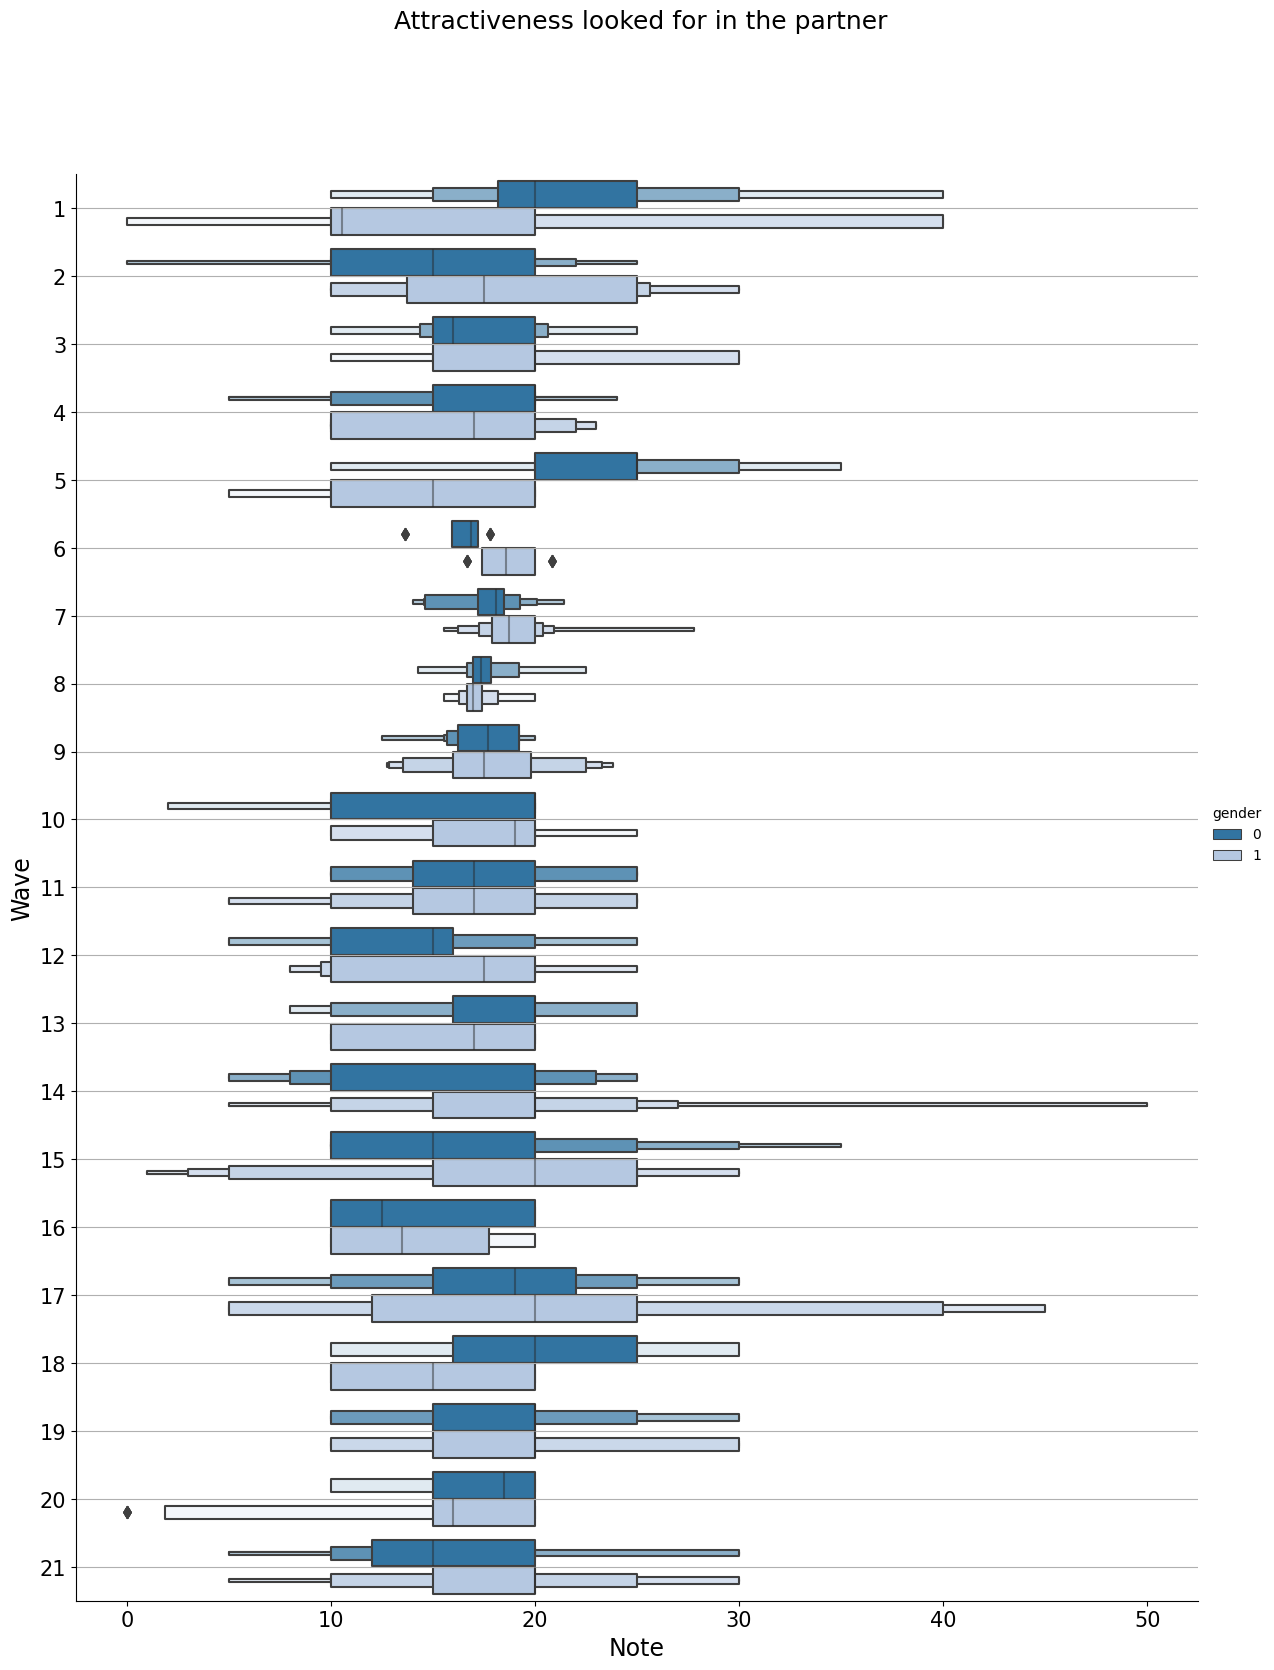

In [ ]:
g = sns.catplot(data=df_mis, x="fun1_1", y="wave", kind="boxen",hue='gender',orient="h",height=15, aspect=0.8,palette='tab20')
labelsize=15
g.tick_params(axis="both",labelsize=labelsize)
g.set_axis_labels("Note","Wave",size=17)
g.fig.suptitle("Attractiveness looked for in the partner",fontsize=18,y=1.1)

plt.grid(axis='y')
# plt.show()

Nous observons que les vagues 6 à 9 présentent des distributions différentes. Cela s'explique par le fait que pour les vagues concernées les personnes ont donné une note. Alors que pour les autres vagues les personnes devaient répartir 100 points parmi les 6 questions posées.

Pour résoudre cet écart nous allons classer les attributs par odre de priorité. C'est à dire que si un attribut détient une note supérieure alors il sera prioritaire pour la personne indépendamment du type de la question posée. Dans le cas de notes similaires, c'est à dire que l'ordre de priorité est le même nous mettrons la même priotrité. Dans ce cas l'attribut suivant sera indexé de 2.

## Analyse des 6 attributs par genre

Nous commençons par regarder ce que recherche chaque genre chez son/sa partenaire.

In [ ]:
labels_ = ['Ambition','Attractiveness','Fun','Intelligence','Shared interests','Sincerity']


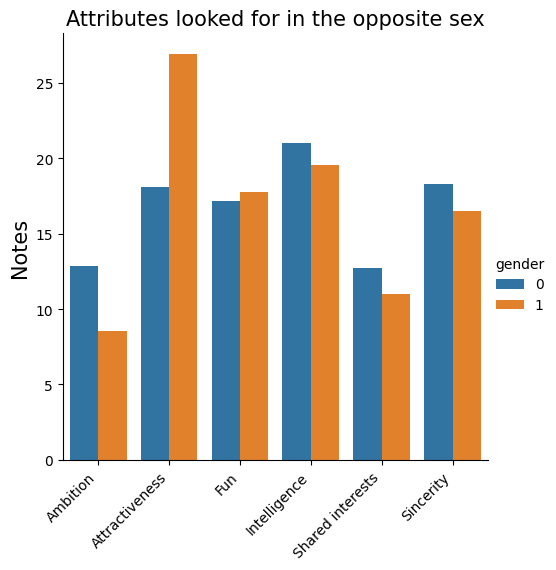

In [ ]:
attributes = ['attr1_1','sinc1_1','fun1_1','amb1_1','intel1_1','shar1_1','gender']
df_concat = df_attributes(attributes)
fg = sns.catplot(data=df_concat,x='cols',y='vals',hue='gender',kind='bar')
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
plt.xlabel('')
plt.title('Attributes looked for in the opposite sex',fontsize=15)
plt.show()

Nous pouvons remarquer une grande différence d'attributs recherchés entre les hommes et les femmes :

 - Pour les hommes, l'attractivité d'une femme est un facteur important, alors que son ambition ou ses inérêts communs sont moindres.
 - Pour les femmes, les attributs recherchés sont mieux répartis, avec l'intelligence classée première.

Nous regardons à présent ce que chaque sexe pense que le sexe opposé recherche chez son/sa partenaire.

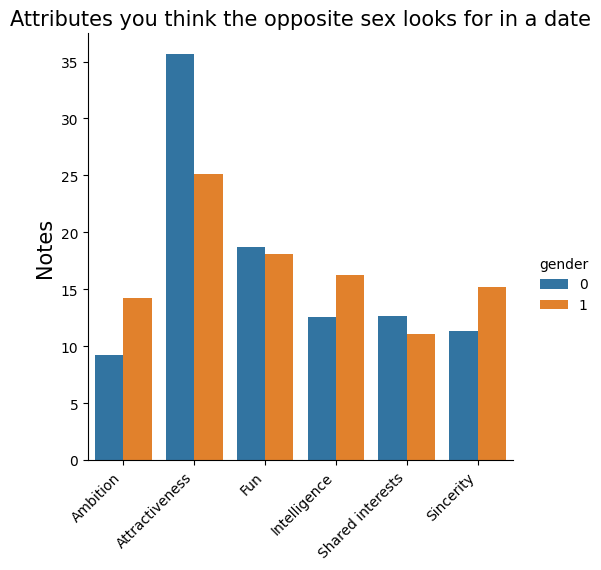

In [ ]:
attributes = ['attr2_1','sinc2_1','fun2_1','amb2_1','intel2_1','shar2_1','gender']
df_concat = df_attributes(attributes)
fg = sns.catplot(data=df_concat,x='cols',y='vals',hue='gender',kind='bar')
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
plt.xlabel('')
plt.title('Attributes you think the opposite sex looks for in a date',fontsize=15)
plt.show()

 - Les femmes sont convaincues que les hommes recherchent en priorité l'attractivité en délaissant l'ambition.
 - Globalement les réponses sont ressemblantes au graphe précédent.

Ensuite les candidats ont été interrogé sur ce qu'ils pensent d'eux mêmes.

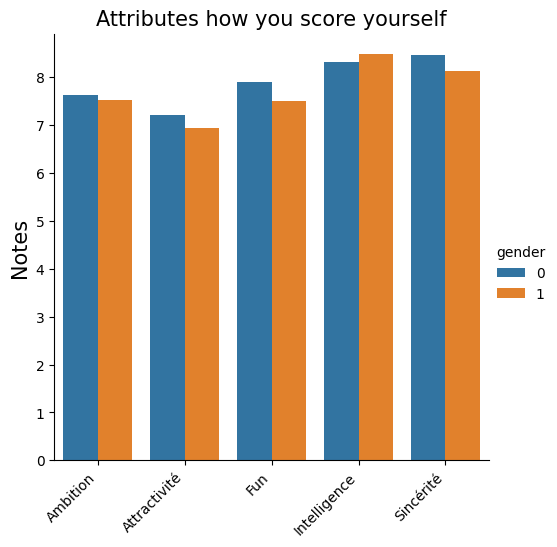

In [ ]:
attributes = ['attr3_1','sinc3_1','fun3_1','amb3_1','intel3_1','gender']
labels_ = ['Ambition','Attractivité','Fun','Intelligence','Sincérité']
df_concat = df_attributes(attributes)
fg = sns.catplot(data=df_concat,x='cols',y='vals',hue='gender',kind='bar')
for ax in fg.axes.flat:  # iterate through each subplot
    labels = ax.get_xticklabels()  # get the position and text for each subplot
    for idx, label in enumerate(labels):
        _, y = label.get_position()  # extract the y tick position
        # txt = label.get_text()  # extract the text
        txt = f'{labels_[idx]}'  # update the text string
        label.set_text(txt)  # set the text
    ax.set_xticklabels(labels,rotation = 45, ha="right")  # update the yticklabels
plt.ylabel('Notes',fontsize=15)
plt.xlabel('')
# plt.ylim([0,38])
plt.title('Attributes how you score yourself',fontsize=15)
plt.show()

Globalement les femmes se notent mieux que les hommmes. Les hommes ont en revanche une meilleure estime de leur intelligence.

Le dataset est constitué des notes attribuées à son partenaire à postériori de la discussion. Nous allons alors nous intéresser à l'influence de ces attributs sur la décision du candidat de revoir son partenaire ou non.

In [ ]:
dfidcor = pd.DataFrame()
dfidcor['id'] = data['iid']
dfidcor[['dec','attr','sinc','intel','fun','amb','shar']] = data.groupby('iid')[['dec','attr','sinc','intel','fun','amb','shar']].mean()
dfidcor = dfidcor.dropna()
dfidcor.shape

(542, 8)

In [ ]:
question = ['attr','sinc','intel','fun','amb','shar']
labels = ['Attractiveness','Sincerity','Intelligence','Fun','Ambition','Shared Interests']

In [ ]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

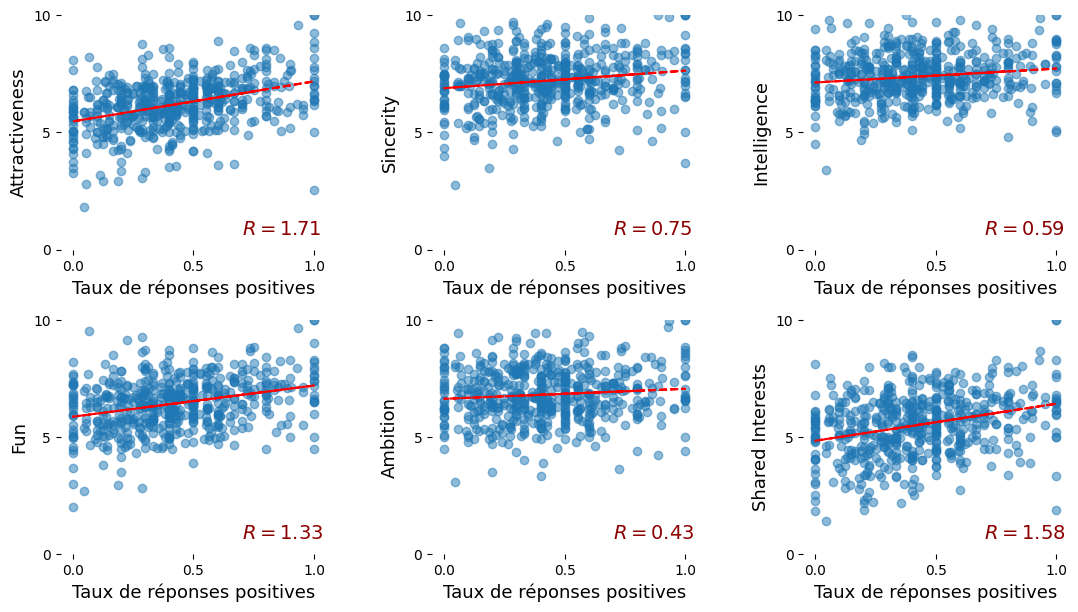

In [ ]:
f, ax = plt.subplots(2,3,figsize=(13,7))
for idx, q in enumerate(question):
    x, y =dfidcor['dec'],dfidcor[q]
    ax[idx//3,idx%3].scatter(x, y, marker='o', alpha=.5)
    m, b = np.polyfit(x, y, 1)
    ax[idx//3,idx%3].plot(x,m*x+b,'r--')
    ax[idx//3,idx%3].text(0.7, 0.65, f'$R={round(m,2)}$', fontdict=font)
    ax[idx//3,idx%3].set_ylim([0,10])
    ax[idx//3,idx%3].set_ylabel(labels[idx], fontsize=13)
    ax[idx//3,idx%3].set_xlabel('Taux de réponses positives', fontsize=13)

    ax[idx//3,idx%3].spines['right'].set_visible(False)
    ax[idx//3,idx%3].spines['top'].set_visible(False)
    ax[idx//3,idx%3].spines['left'].set_visible(False)
    ax[idx//3,idx%3].spines['bottom'].set_visible(False)

    ax[idx//3,idx%3].set_xticks([0,0.5,1])
    ax[idx//3,idx%3].set_yticks([0,5,10])
plt.subplots_adjust(wspace=0.4,
                    hspace=0.3)

# L'amour est-il un phénomène déterministe ?

L'objectif sera de déterminer si des personnes de speed-dating différents matcheraient pour les mettre en contact à l'occasion d'une future rencontre.

Heureusement pour l'issue de la prédiction, nous n'avons pas nécessairement besoin des colonnes ayant de nombreuses valeurs manquantes.

In [ ]:
to_drop = []
tmp = [col for col in data.columns if '1_s' in col or '3_s' in col]
to_drop += tmp
tmp = [col for col in data.columns if '_2' in col]
tmp += ['length']
to_drop += tmp
tmp = [col for col in data.columns if '_3' in col]
tmp += ['you_call', 'them_cal']
to_drop += tmp

print(f"Original shape: {data.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del data[col]

print(f"New shape: {data.shape}")

Original shape: (8378, 195)
Dropping 87 columns
New shape: (8378, 108)


Nous allons ensuite enlever les colonnes qui n'ont normalement aucun effet sur la décision du partenaire car elles ne lui sont pas connues. Nous gardons seulement la feature d'avoir apprécié la dicsussion car c'est un ressenti.

In [ ]:
to_drop = ['dec_o']#, 'dec']
print(f"Original shape: {data.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del data[col]

print(f"New shape: {data.shape}")

Original shape: (8378, 108)
Dropping 1 columns
New shape: (8378, 107)


Nous enlevons maintenant les colonnes où il manque beaucoup de données ainsi que celles qui n'ont pas à voir avec le partenaire.

In [ ]:
to_drop = ['positin1', 'undergra', 'mn_sat', 'tuition', 'zipcode', 'income', 'expnum', 'match_es']
to_drop += [col for col in data.columns if '5_1' in col or '4_1' in col]  # sadly, not asked to everyone

print(f"Original shape: {data.shape}")
print(f"Dropping {len(to_drop)} columns")

for col in to_drop:
    del data[col]

print(f"New shape: {data.shape}")

Original shape: (8378, 107)
Dropping 19 columns
New shape: (8378, 88)


In [ ]:
print('Unique id\'s in original dataframe: {}'.format(len(data.iid.unique())))
df_full = data[data.pid.notnull()].copy()  # dropping les rencontres manquantes de la vague 5
print('Shape original dataframe: {}'.format(df_full.shape))
personal = ['gender', 'age', 'field', 'field_cd', 'race', 'imprace', 'imprelig',
            'goal', 'date', 'go_out', 'career',
            'career_c', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
            'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
            'movies', 'concerts', 'music', 'shopping', 'yoga', 'exphappy']
personal += [col for col in df_full.columns if '1_1' in col]
print('_'*40)
print('_'*40)

participant = df_full[['iid', 'wave'] + personal].drop_duplicates().copy()
print('Unique id\'s in participants\' dataframe: {}'.format(len(participant.iid.unique())))
print('Shape participants\' dataframe: {}'.format(participant.shape))
print('_'*40)
print('Missing values about participants:')
cols = participant.columns
for col in cols:
    mis = participant[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/participant.shape[0] * 100, 3)))
print('_'*40)
print('_'*40)

personal_o = ['age_o','race_o','pf_o_att','pf_o_sin','pf_o_int','pf_o_fun','pf_o_amb','pf_o_sha']
partner = df_full[['pid', 'wave'] + personal_o].drop_duplicates().copy()
print('Unique id\'s in partners\' dataframe: {}'.format(len(partner.pid.unique())))
print('Shape partners\' dataframe: {}'.format(partner.shape))
print('_'*40)
print('Missing values about partners:')
cols = partner.columns
for col in cols:
    mis = partner[col].isnull().sum()
    if mis > 0:
        print("{}: {} missing, {}%".format(col, mis, round(mis/partner.shape[0] * 100, 3)))

Unique id's in original dataframe: 551
Shape original dataframe: (8368, 88)
________________________________________
________________________________________
Unique id's in participants' dataframe: 551
Shape participants' dataframe: (551, 38)
________________________________________
Missing values about participants:
age: 8 missing, 1.452%
field: 6 missing, 1.089%
field_cd: 7 missing, 1.27%
race: 6 missing, 1.089%
imprace: 7 missing, 1.27%
imprelig: 7 missing, 1.27%
goal: 7 missing, 1.27%
date: 8 missing, 1.452%
go_out: 7 missing, 1.27%
career: 8 missing, 1.452%
career_c: 12 missing, 2.178%
sports: 7 missing, 1.27%
tvsports: 7 missing, 1.27%
exercise: 7 missing, 1.27%
dining: 7 missing, 1.27%
museums: 7 missing, 1.27%
art: 7 missing, 1.27%
hiking: 7 missing, 1.27%
gaming: 7 missing, 1.27%
clubbing: 7 missing, 1.27%
reading: 7 missing, 1.27%
tv: 7 missing, 1.27%
theater: 7 missing, 1.27%
movies: 7 missing, 1.27%
concerts: 7 missing, 1.27%
music: 7 missing, 1.27%
shopping: 7 missing, 1.2

In [ ]:
col_to_filt = ['age', 'race']
mis_id = []

for col in col_to_filt:
    mis_id = list(set(mis_id + list(participant[participant[col].isna()].iid.values)))
    mis_id = list(set(mis_id + list(partner[partner[col + '_o'].isna()].pid.values)))

print(f'Original number of participants: {participant.shape[0]}')

mis_id += [28] # cet personne a bcp de valeurs manquantes
participant = participant[~participant.iid.isin(mis_id)]
partner = partner[~partner.pid.isin(mis_id)]

print(f"Dropping {len(mis_id)} participants")
print(f"New number of participants: {participant.shape[0]}")

Original number of participants: 551
Dropping 9 participants
New number of participants: 542


In [ ]:
print(f'Original shape of the dataframe: {df_full.shape}')
df_clean = df_full[~(df_full.iid.isin(mis_id) | df_full.pid.isin(mis_id))].copy()
del df_clean['id']  # l'id au sein du groupe de speed dating n'est pas pertinent
del df_clean['field']  # c'est field_cd mais non codé
del df_clean['career']
del df_clean['career_c']
del df_clean['from']
del df_clean['partner']  # id du partenaire au sein du groupe

print(f'Shape of the cleaned data: {df_clean.shape}')

Original shape of the dataframe: (8368, 88)
Shape of the cleaned data: (8148, 82)


In [ ]:
df_clean.loc[df_clean.field_cd.isna(), 'field_cd'] = 18  # 'Other' easy cleaning

C'est un nettoyage assez fastidieux mais nécessaire car tout autre méthode n'aurait pas permis de garder un maximum de données compte tenu du nombre de données manquantes. Si nous enlevons juste les lignes ayant des données manquantes il nous resterait environ 600 lignes contre 8000 actuellement.

In [ ]:
df_clean.loc[df_clean.met.isna(), 'met'] = 0
df_clean.loc[df_clean.met_o.isna(), 'met_o'] = 0

df_clean.loc[df_clean.met < 2, 'met'] = 0
df_clean.loc[df_clean.met_o < 2, 'met_o'] = 0
df_clean.loc[df_clean.met > 1, 'met'] = 1
df_clean.loc[df_clean.met_o > 1, 'met_o'] = 1

df_clean.loc[df_clean.gaming > 10, 'gaming'] = 10
df_clean.loc[df_clean.reading > 10, 'reading'] = 10

In [ ]:
sprs = ['Und.', 'Arch.', 'Lang.']

df_clean.loc[df_clean.field_cd.isin(sprs), 'field_cd'] = 18

In [ ]:
df_clean.head()

,iid,gender,idg,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,dec,attr,sinc,intel,fun,amb,shar,like,prob,met
0,1,0,1,1,1,10,7,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,1.0
1,1,0,1,1,1,10,7,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,0.0
2,1,0,1,1,1,10,7,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,0.0
3,1,0,1,1,1,10,7,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,1.0
4,1,0,1,1,1,10,7,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,1,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,1.0


In [ ]:
prtn_cols = ['field_cd', 'imprace', 'imprelig', 'goal',
             'date', 'go_out', 'sports', 'tvsports', 'exercise', 'dining', 'museums',
             'art', 'hiking', 'gaming', 'clubbing', 'reading', 'tv', 'theater',
             'movies', 'concerts', 'music', 'shopping', 'yoga']

tmp = df_clean[['iid', 'pid']+ prtn_cols].copy()
tmp = tmp.rename(columns={'iid' : 'pid', 'pid': 'iid'}) # reversing iid and pid in the temporary frame

renaming = {col : col+'_o' for col in prtn_cols}
tmp = tmp.rename(columns=renaming)

df_clean = pd.merge(df_clean, tmp, on=['iid', 'pid'])

del tmp

# checking it went well
df_clean[((df_clean.iid == 1) & (df_clean.pid == 11)) |
         ((df_clean.iid == 11) & (df_clean.pid == 1))][['iid', 'pid', 'gender', 'museums', 'field_cd', 'museums_o', 'field_cd_o']]

,iid,pid,gender,museums,field_cd,museums_o,field_cd_o
0,1,11.0,0,1.0,1.0,7.0,8.0
100,11,1.0,1,7.0,8.0,1.0,1.0


In [ ]:
# waves where the points were given differently
df_clean['vote_differently'] = 0
df_clean.loc[(df_clean.wave > 5) & (df_clean.wave < 10), 'vote_differently'] = 1

# wave where they could chose only 50%
df_clean['on_a_budget'] = 0
df_clean.loc[df_clean.wave == 12, 'on_a_budget'] = 1

# waves where they were asked to come with a magazine
df_clean['with_magazine'] = 0
df_clean.loc[(df_clean.wave == 18) | (df_clean.wave == 21), 'with_magazine'] = 1

# waves where they were asked to come with a book
df_clean['with_book'] = 0
df_clean.loc[(df_clean.wave == 19) | (df_clean.wave == 20), 'with_book'] = 1

La différence de note pour un intérêt entre 2 personnes peut être plus intéressante que les notes séparées de chacun. Cela permet aussi de réduire le nombre de features pour le modèle.

In [ ]:
for col in interests:
    # difference in opinion about an interest
    df_clean[col+'_sh'] = (df_clean[col] - df_clean[col+'_o'])

In [ ]:
# relative age difference
df_clean['age_diff'] = (df_clean['age'] - df_clean['age_o'])
# df_clean.loc[(df_clean.age_diff > 0) & (df_clean.gender == 'Male'), 'age_diff_cat'] = 'older_male'
# df_clean.loc[(df_clean.age_diff > 0) & (df_clean.gender == 'Female'), 'age_diff_cat'] = 'older_female'
# df_clean.loc[(df_clean.age_diff < 0) & (df_clean.gender == 'Male'), 'age_diff_cat'] = 'younger_male'
# df_clean.loc[(df_clean.age_diff < 0) & (df_clean.gender == 'Female'), 'age_diff_cat'] = 'younger_female'
# df_clean.loc[(df_clean.age_diff == 0), 'age_diff_cat'] = 'same_age'

# who remembers if they met
df_clean['met_comp'] = df_clean['met'] - df_clean['met_o']
# df_clean.loc[df_clean.met_comp == 0, 'met_comp'] = 'same'
# df_clean.loc[df_clean.met_comp == 1, 'met_comp'] = 'partec'
# df_clean.loc[df_clean.met_comp == -1, 'met_comp'] = 'partner'

# same field flag
df_clean['same_field'] = 0
df_clean.loc[df_clean.field_cd == df_clean.field_cd_o, 'same_field'] = 1

# same goal flag
df_clean['same_goal'] = 0
df_clean.loc[df_clean.goal == df_clean.goal_o, 'same_goal'] = 1

In [ ]:
test = df_clean[['iid', 'order', 'like']].copy().sort_values(by=['order']).fillna(6)
# fill the missing with neutral vote

# How good is the night in general?
test['like_cumulative'] = test.groupby(['iid'])['like'].cumsum()
test['mean_liking'] = test.like_cumulative / test.order

# How good it the person with respect to the mean
test['like_spread'] = test.like.fillna(6) - test.mean_liking

# Did they encounter someone they liked a lot already?
test['high_like'] = 0
test.loc[test.like > 8, 'high_like'] = 1
test['high_like'] = test.groupby('iid')['high_like'].cumsum()
test.loc[test.high_like > 1, 'high_like'] = 1

# removing columns
del test['like_cumulative']
del test['like']

# putting together
df_clean = pd.merge(df_clean, test, on=['iid', 'order'])

del test

In [ ]:
you_look = [col for col in data.columns if '1_1' in col] # what you look for in the opposite sex
other_look =  [col for col in data.columns if '4_1' in col] # you think other like you look for in the opposite sex
opp_look = [col for col in data.columns if '2_1' in col] # you think the opposite sex look for in you
you_score = [col for col in data.columns if '3_1' in col] # how do you score yourself
they_score = [col for col in data.columns if '5_1' in col] # the others score you

Il faut enlever 'dec' car il est directement corréler au match.

In [ ]:
del df_clean['dec']

In [ ]:
general_info = ['gender', 'condtn', 'order']#, 'with_book', 'with_magazine', 'on_a_budget', 'vote_differently']
participant_info = ['age', 'met', 'field_cd', 'race', 'imprace',
                    'imprelig', 'goal', 'date', 'go_out', 'exphappy'] + you_look + you_score + opp_look
partner_info = [col for col in df_clean.columns if 'pf_o_' in col] + ['age_o', 'met_o', 'field_cd_o', 'race_o', 'imprace_o', 'imprelig_o',
                'goal_o', 'date_o', 'go_out_o']
interests_o = [col+'_o' for col in interests]
votes = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'like', 'prob']
votes_o = ['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o', 'prob_o']
special_votes = ['mean_liking', 'like_spread', 'high_like']
shared = [col+'_sh' for col in interests] + ['int_corr', 'samerace', 'age_diff', 'met_comp', 'same_field', 'same_goal']#,'age_diff_cat'
target = df_clean['match']


# Creating frames
df_participants = df_clean[general_info+participant_info+interests+votes].copy()
df_partner = df_clean[general_info+partner_info+interests_o+votes_o].copy()
df_both = df_clean[general_info+participant_info+partner_info+
                   interests+votes+interests_o+votes_o+shared].copy()

In [ ]:
df_clean.head()

,iid,gender,idg,condtn,wave,round,position,order,pid,match,int_corr,samerace,age_o,race_o,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o,age,field_cd,race,imprace,imprelig,goal,date,go_out,sports,tvsports,exercise,dining,museums,art,hiking,gaming,clubbing,reading,tv,theater,movies,concerts,music,shopping,yoga,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr,sinc,intel,fun,amb,shar,like,prob,met,field_cd_o,imprace_o,imprelig_o,goal_o,date_o,go_out_o,sports_o,tvsports_o,exercise_o,dining_o,museums_o,art_o,hiking_o,gaming_o,clubbing_o,reading_o,tv_o,theater_o,movies_o,concerts_o,music_o,shopping_o,yoga_o,vote_differently,on_a_budget,with_magazine,with_book,sports_sh,tvsports_sh,exercise_sh,dining_sh,museums_sh,art_sh,hiking_sh,gaming_sh,clubbing_sh,reading_sh,tv_sh,theater_sh,movies_sh,concerts_sh,music_sh,shopping_sh,yoga_sh,age_diff,met_comp,same_field,same_goal,mean_liking,like_spread,high_like
0,1,0,1,1,1,10,7,4,11.0,0,0.14,0,27.0,2.0,35.0,20.0,20.0,20.0,0.0,5.0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,1.0,8.0,7.0,3.0,1.0,5.0,4.0,8.0,7.0,2.0,6.0,7.0,5.0,5.0,5.0,4.0,9.0,2.0,4.0,8.0,7.0,8.0,5.0,1.0,0,0,0,0,1.0,-5.0,6.0,3.0,-6.0,-4.0,0.0,-4.0,1.0,-3.0,7.0,-3.0,2.0,3.0,1.0,3.0,0.0,-6.0,0.0,0,0,6.500000,0.500000,0
1,1,0,1,1,1,10,7,3,12.0,0,0.54,0,22.0,2.0,60.0,0.0,0.0,40.0,0.0,0.0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,9.0,7.0,9.0,8.0,7.0,6.0,3.0,3.0,5.0,6.0,6.0,4.0,7.0,7.0,9.0,5.0,5.0,0,0,0,0,0.0,-5.0,-1.0,1.0,-6.0,-5.0,2.0,-2.0,0.0,0.0,3.0,-3.0,3.0,3.0,0.0,3.0,-4.0,-1.0,-1.0,1,0,6.333333,0.666667,0
2,1,0,1,1,1,10,7,10,13.0,1,0.16,1,22.0,4.0,19.0,18.0,19.0,18.0,14.0,12.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,0.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,8.0,9.0,8.0,5.0,7.0,7.0,NaN,0.0,1.0,3.0,5.0,2.0,7.0,1.0,7.0,8.0,2.0,9.0,5.0,6.0,4.0,7.0,7.0,6.0,8.0,10.0,8.0,9.0,9.0,8.0,1.0,0,0,0,0,2.0,-6.0,6.0,0.0,-4.0,-5.0,1.0,-6.0,-2.0,0.0,1.0,-9.0,2.0,1.0,0.0,0.0,0.0,-1.0,0.0,1,1,6.500000,0.500000,0
3,1,0,1,1,1,10,7,5,14.0,1,0.61,0,23.0,2.0,30.0,5.0,15.0,40.0,5.0,5.0,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,7.0,6.0,8.0,7.0,6.0,8.0,7.0,6.0,1.0,1.0,1.0,1.0,2.0,4.0,1.0,10.0,6.0,8.0,8.0,3.0,3.0,10.0,8.0,8.0,6.0,7.0,3.0,10.0,6.0,8.0,6.0,1.0,0,0,0,0,-1.0,-4.0,0.0,1.0,-2.0,-2.0,-5.0,-7.0,-3.0,0.0,2.0,-2.0,0.0,4.0,1.0,2.0,0.0,-2.0,0.0,1,1,6.600000,0.400000,0
4,1,0,1,1,1,10,7,7,15.0,1,0.21,0,24.0,3.0,30.0,10.0,20.0,10.0,10.0,20.0,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,1.0,21.0,1.0,4.0,2.0,4.0,2.0,7.0,1.0,9.0,2.0,8.0,9.0,1.0,1.0,5.0,1.0,5.0,6.0,9.0,1.0,10.0,10.0,9.0,8.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,35.0,20.0,15.0,20.0,5.0,5.0,6.0,8.0,8.0,8.0,7.0,5.0,6.0,7.0,7.0,6.0,6.0,6.0,6.0,1.0,1.0,3.0,1.0,1.0,4.0,1.0,9.0,7.0,9.0,7.0,4.0,3.0,6.0,7.0,9.0,8.0,6.0,9.0,9.0,6.0,7.0,2.0,1.0,0,0,0,0,0.0,-5.0,-1.0,2.0,-3.0,-2.0,-1.0,-6.0,-4.0,-2.0,3.0,-8.0,1.0,4.0,2.0,6.0,0.0,-3.0,0.0,1,0,6.428571,-0.428571,0


## Prediction avec seulement les informations sur soi et celles que l'on peut obtenir sur son partenaire pendant la discussion.

In [ ]:
df_ = df_clean[general_info+partner_info+participant_info+shared].copy()

In [ ]:
df_train = pd.get_dummies(df_,
                          columns=['gender'],
                          drop_first=True)

# things to drop because it improves the model
del df_train['race']
# del df_train['like_spread']
del df_train['goal']
del df_train['field_cd']
# del df_train['with_book']
del df_train['date']
del df_train['condtn']
del df_train['field_cd_o']
del df_train['met_o']
del df_train['met']
del df_train['met_comp']
# del df_train['age_diff_cat']

freq_map = {'Almost_never' : 0.0,
            'Several_py': 1.0,
            'Once_pm': 2.0,
            'Twice_pm': 3.0,
            'Once_pw': 4.0,
            'Twice_pw': 5.0,
            'Several_pw': 6.0}
partic_cols = df_train.columns  # will be needed in the last section
#df_train.go_out = df_train.go_out.map(freq_map)
df_train.head()

,order,pf_o_att,pf_o_sin,pf_o_int,pf_o_fun,pf_o_amb,pf_o_sha,age_o,race_o,imprace_o,imprelig_o,goal_o,date_o,go_out_o,age,imprace,imprelig,go_out,exphappy,attr1_1,sinc1_1,intel1_1,fun1_1,amb1_1,shar1_1,attr3_1,sinc3_1,fun3_1,intel3_1,amb3_1,attr2_1,sinc2_1,intel2_1,fun2_1,amb2_1,shar2_1,sports_sh,tvsports_sh,exercise_sh,dining_sh,museums_sh,art_sh,hiking_sh,gaming_sh,clubbing_sh,reading_sh,tv_sh,theater_sh,movies_sh,concerts_sh,music_sh,shopping_sh,yoga_sh,int_corr,samerace,age_diff,same_field,same_goal,gender_1
0,4,35.0,20.0,20.0,20.0,0.0,5.0,27.0,2.0,7.0,3.0,1.0,5.0,4.0,21.0,2.0,4.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,1.0,-5.0,6.0,3.0,-6.0,-4.0,0.0,-4.0,1.0,-3.0,7.0,-3.0,2.0,3.0,1.0,3.0,0.0,0.14,0,-6.0,0,0,0
1,3,60.0,0.0,0.0,40.0,0.0,0.0,22.0,2.0,1.0,1.0,1.0,1.0,1.0,21.0,2.0,4.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,0.0,-5.0,-1.0,1.0,-6.0,-5.0,2.0,-2.0,0.0,0.0,3.0,-3.0,3.0,3.0,0.0,3.0,-4.0,0.54,0,-1.0,1,0,0
2,10,19.0,18.0,19.0,18.0,14.0,12.0,22.0,4.0,3.0,5.0,2.0,7.0,1.0,21.0,2.0,4.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,2.0,-6.0,6.0,0.0,-4.0,-5.0,1.0,-6.0,-2.0,0.0,1.0,-9.0,2.0,1.0,0.0,0.0,0.0,0.16,1,-1.0,1,1,0
3,5,30.0,5.0,15.0,40.0,5.0,5.0,23.0,2.0,1.0,1.0,2.0,4.0,1.0,21.0,2.0,4.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,-1.0,-4.0,0.0,1.0,-2.0,-2.0,-5.0,-7.0,-3.0,0.0,2.0,-2.0,0.0,4.0,1.0,2.0,0.0,0.61,0,-2.0,1,1,0
4,7,30.0,10.0,20.0,10.0,10.0,20.0,24.0,3.0,3.0,1.0,1.0,4.0,1.0,21.0,2.0,4.0,1.0,3.0,15.0,20.0,20.0,15.0,15.0,15.0,6.0,8.0,8.0,8.0,7.0,35.0,20.0,15.0,20.0,5.0,5.0,0.0,-5.0,-1.0,2.0,-3.0,-2.0,-1.0,-6.0,-4.0,-2.0,3.0,-8.0,1.0,4.0,2.0,6.0,0.0,0.21,0,-3.0,1,0,0


In [ ]:
df_train.shape

(8148, 59)

Il reste quelques valeurs manquantes au sein du dataset

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold, GridSearchCV, cross_val_predict
from sklearn.model_selection import learning_curve

from sklearn.metrics import confusion_matrix, classification_report

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import xgboost as xgb
from itertools import product

In [ ]:
kfolds = KFold(n_splits=5, shuffle=True, random_state=14)

imputer = ('imputer', SimpleImputer())

In [ ]:
def pretty_grid(model, param_grid, train, target, scoring, cv=5, n_jobs=1, verbose=False):
    grid = GridSearchCV(model, param_grid=param_grid,
                        cv=cv, n_jobs=n_jobs, scoring=scoring,
                        return_train_score=True)
    grid.fit(train, target)
    best_model = grid.best_estimator_
    print(best_model)
    print("_"*40)
    print(pd.DataFrame(grid.cv_results_)[['params',
                                          'mean_test_score', 'std_test_score']].loc[grid.best_index_])
    if verbose:
        print("_"*40)
        print(pd.DataFrame(grid.cv_results_)[['params','mean_test_score','std_test_score']])
    return best_model
def get_feature_importance(clsf, ftrs):
    imp = clsf.steps[-1][1].feature_importances_.tolist() #it's a pipeline
    feats = ftrs
    result = pd.DataFrame({'feat':feats,'score':imp})
    result = result.sort_values(by=['score'],ascending=False)
    return result

In [ ]:
pipe = Pipeline([imputer,
                 ('xgb', XGBClassifier(n_jobs=1, random_state=42))])

param_grid = [{'xgb__n_estimators' : [1100, 1200, 1300],
               'xgb__learning_rate': [0.1, 0.05, 0.01]}]

best_participant = pretty_grid(pipe, param_grid, df_train, target,
                               'accuracy', cv=kfolds, n_jobs=-1)

Pipeline(steps=[('imputer', SimpleImputer()),
                ('xgb',
                 XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
                               colsample_bylevel=1, colsample_bynode=1,
                               colsample_bytree=1, early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, gamma=0, gpu_id=-1,
                               grow_policy='depthwise', importance_type=None,
                               interaction_constraints='', learning_rate=0.05,
                               max_bin=256, max_cat_threshold=64,
                               max_cat_to_onehot=4, max_delta_step=0,
                               max_depth=6, max_leaves=0, min_child_weight=1,
                               missing=nan, monotone_constraints='()',
                               n_estimators=1200, n_jobs=1, num_parallel_tree=1,
                             

In [ ]:
impparti = get_feature_importance(best_participant, df_train.columns)

In [ ]:
impparti

,feat,score
58,gender_1,0.026667
17,go_out,0.021126
35,shar2_1,0.020519
12,date_o,0.020179
9,imprace_o,0.020155
56,same_field,0.020054
7,age_o,0.019969
21,intel1_1,0.019836
14,age,0.019613
27,fun3_1,0.019139


In [ ]:
explainer = shap.TreeExplainer(best_participant[1])

In [ ]:
shap_values = explainer.shap_values(df_train.iloc[:100])

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


Le modèle réalisé a une accuracy de 84%. Nous allons analyser l'influence des différentes features sur la probabilité de match à la fin de la rencontre.

In [ ]:
shap.initjs()

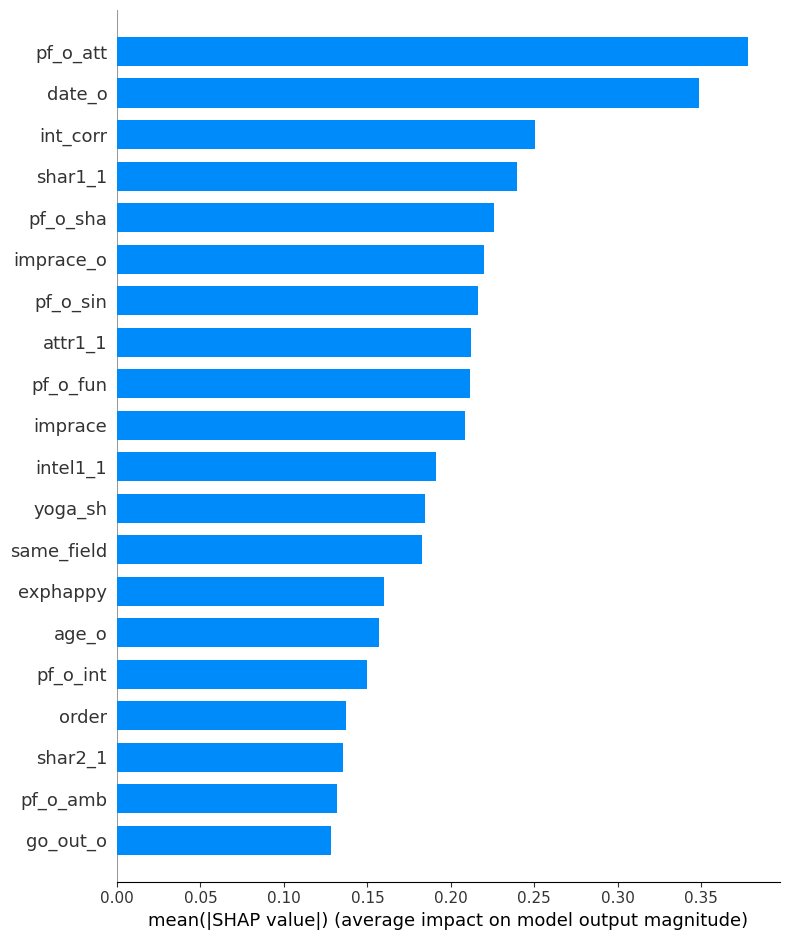

In [ ]:
shap.summary_plot(shap_values, df_train.iloc[:8000], plot_type="bar")

Nous remarquons que les facteurs les plus influents sont :
 - pf_o_att qui représente les personnes ayant identifiées l'attraction comme premier attribut recherché chez son/sa partenaire.
 - int_corr qui correspond à la corrélation entre les intérêts des 2 personnes participant à la discussion.
 - shar1_1 qui est la note attribué à la recherche de points communs dans les activités avec son partenaire.

Nous pouvons conclure que le modèle actuel performe de façon satisfaisante en considérant que nous n'utilisons que des données acquise avant la rencontre. Au global les personnes favorables à matcher sont celles ayant des points communs. Ce qui semble logique après une discussion de 4 minutes. Les points abordés sont sûrement centrés autour de ces activités communes.

## Approndissement

Il serait préférable de garder la donnée sur les vagues de participation pour prendre un dataset de test avec des personnes d'une vague n'étant pas dans le dataset d'entraînement.
Avec plus temps l'idée serait de mettre en relation les personnes de différentes vagues de speed-dating qui ont la meilleure probabilité de match. Nous pourrions ainsi optimiser leur temps et leur recommender la meilleure personne possible.